In [90]:
%matplotlib notebook
%matplotlib inline

In [91]:


# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
#import gmaps
#from config import gkey


In [92]:
# URL
renew_energy_url = "https://api.worldbank.org/v2/en/country/all/indicator/EG.FEC.RNEW.ZS?format=json&per_page=20000&source=2"
cntry_url = 'https://restcountries.eu/rest/v2/all'

In [93]:
# Get Renewable Energy Consumption Data
renew_energy_response = requests.get(renew_energy_url).json()
reo = renew_energy_response[1]

# building percent of renewable energy dataframe 
#starting with country
country = [reo[i]['country']['value'] for i in range(len(reo))]
renew_energy_df = pd.DataFrame({'Country':country})

# adding year column to dataframe
year= [reo[i]['date'] for i in range(len(reo))]
renew_energy_df["Year"]= year

# adding alphacode column to dataframe
a_code = [reo[i]['countryiso3code'] for i in range(len(reo))]
renew_energy_df["alpha3code"]= a_code

# adding Percent Renewable value to dataframe
percent_renewable = [reo[i]['value'] for i in range(len(reo))]
renew_energy_df["Percent Renewable"]= percent_renewable

# dropping rows with blank alphacodes - maybe this will do the trick to remove all "non-countries"
renew_energy_df = renew_energy_df[renew_energy_df.alpha3code != ""]

# reomving all nan values for percent renewable
renew_energy_df = renew_energy_df[np.isfinite(renew_energy_df['Percent Renewable'])]

# Changing Year column dtype to float

renew_energy_df["Year"] = pd.to_numeric(renew_energy_df["Year"])

# limiting years to 2000-2015

renew_energy_df = renew_energy_df.drop(renew_energy_df[(renew_energy_df.Year < 2000) | (renew_energy_df.Year > 2015)].index)
#renew_energy_df = renew_energy_df.drop(columns=["alpha3code"])

renew_energy_df.columns=["Country", "Year", "Code", "Percent Renewable"]
renew_energy_df.head()

,Country,Year,Code,Percent Renewable
2776,Afghanistan,2015,AFG,18.423477
2777,Afghanistan,2014,AFG,19.314269
2778,Afghanistan,2013,AFG,16.334293
2779,Afghanistan,2012,AFG,13.973586
2780,Afghanistan,2011,AFG,11.482706


In [94]:
# Get Countries, Lat, Long Data
cntry_response = requests.get(cntry_url).json()

# Process each country and store details in a list
cntry_ls = []
for index, each in enumerate(cntry_response):
    try:
        c_name = each['name']
        c_code = each['alpha3Code']
        c_lat = each['latlng'][0]
        c_lng = each['latlng'][1]
        c_pop = each['population']
        c_area = each['area']
        c_details = [c_name, c_code, c_pop, c_area, c_lat, c_lng]
        cntry_ls.append(c_details)
    except:
        print(f"Data not found for {c_name}")

# Convert list to dataframe        
cntry_df = pd.DataFrame(cntry_ls, columns=["Country", "Code", "Population", "Area", "Lat", "Lng"])

# Convert data to numeric
cntry_df["Population"] = pd.to_numeric(cntry_df["Population"])
cntry_df["Area"] = pd.to_numeric(cntry_df["Area"])
cntry_df["Lat"] = pd.to_numeric(cntry_df["Lat"])
cntry_df["Lng"] = pd.to_numeric(cntry_df["Lng"])

# Cross Join year
years = []
for i in range(2000, 2016, 1):
    years.append(i)
years_df = pd.DataFrame(years, columns=["Year"])
years_df

cntry_df['dummykey'] = 0
years_df['dummykey'] = 0

countries_df = cntry_df.merge(years_df, how='outer')

countries_df = countries_df.drop(columns=["dummykey"])
countries_df.head()

Data not found for United States Minor Outlying Islands


,Country,Code,Population,Area,Lat,Lng,Year
0,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2000
1,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2001
2,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2002
3,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2003
4,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2004


In [95]:
# Get Emission data
emm_df = pd.read_csv("EmissionData.csv", skiprows=4)

# Unpivot: Change year columns to rows
emm_df = pd.melt(emm_df, id_vars=['Country Name','Country Code'], value_vars=['2000', '2001', '2002', '2003', '2004', '2005',
                                                       '2006', '2007', '2008', '2009', '2010', '2011',
                                                       '2012', '2013', '2014', '2015'])
emm_df.columns=["Country", "Code", "Year", "Emission"]
emm_df = emm_df.dropna()
emm_df["Year"] = pd.to_numeric(emm_df["Year"])
emm_df.head()

,Country,Code,Year,Emission
0,Aruba,ABW,2000,26.194875
1,Afghanistan,AFG,2000,0.038506
2,Angola,AGO,2000,0.580353
3,Albania,ALB,2000,0.978175
4,Andorra,AND,2000,8.019284


In [96]:
# Get Education Data
Ed_df = pd.read_csv("college_ed.csv")

Ed_df.groupby(['Country']).head()

Ed_df = Ed_df.drop(Ed_df[(Ed_df.Year < 2000) | (Ed_df.Year > 2015)].index)
Ed_df.head()

,Country,Code,Year,College Enrolment ratio
14,Afghanistan,AFG,2003,1.25684
15,Afghanistan,AFG,2004,1.25603
16,Afghanistan,AFG,2009,3.90339
17,Afghanistan,AFG,2011,3.75598
18,Afghanistan,AFG,2014,8.66280


In [98]:
# Get GDP Data
gdp_file = 'gdp.csv'
gdp_df = pd.read_csv(gdp_file)

gdp_df.drop(['1960', '1961','1962','1963','1964',
         '1965', '1966','1967', '1968','1969',
         '1970','1971','1972', '1973','1974',
         '1975','1976','1977','1978','1979',
         '1980','1981','1982','1983','1984',
         '1985','1986', '1987','1988','1989',
         '1990', '1991','1992','1993','1994',
         '1995', '1996','1997','1998','1999',
         '2016','2017','2018'], axis=1, inplace=True)

del gdp_df['Indicator Code']
del gdp_df['Indicator Name']

gdp_df =pd.melt(gdp_df, id_vars=['Country Name','Country Code'],value_vars=['2000', '2001', '2002', '2003', '2004', '2005',
                                                                       '2006', '2007', '2008', '2009', '2010', '2011',
                                                                       '2012', '2013', '2014', '2015'])

gdp_df.drop( gdp_df[gdp_df ['value'] == 0.000000 ].index , inplace=True)

gdp_df = gdp_df.rename({'Country Name': 'Country'}, axis=1)
gdp_df = gdp_df.rename({'Country Code': 'Code'}, axis=1)
gdp_df = gdp_df.rename({'value': 'GDP'}, axis=1)
gdp_df = gdp_df.rename({'variable': 'Year'}, axis=1)
gdp_df = gdp_df.dropna(how='any')
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"])
gdp_df.head()

,Country,Code,Year,GDP
0,Aruba,ABW,2000,1.873453e+09
2,Angola,AGO,2000,9.129595e+09
3,Albania,ALB,2000,3.480355e+09
4,Andorra,AND,2000,1.434430e+09
5,Arab World,ARB,2000,7.351881e+11


In [99]:
# Get Renew Energy Kwh data
renew_kwh_df = pd.read_csv("RenewKwh.csv", skiprows=4)

# Unpivot: Change year columns to rows
renew_kwh_df = pd.melt(renew_kwh_df, id_vars=['Country Name','Country Code'], value_vars=['2000', '2001', '2002', '2003', '2004', '2005',
                                                       '2006', '2007', '2008', '2009', '2010', '2011',
                                                       '2012', '2013', '2014', '2015'])
renew_kwh_df.columns=["Country", "Code", "Year", "Renew Kwh"]
renew_kwh_df = renew_kwh_df.dropna()
renew_kwh_df["Year"] = pd.to_numeric(renew_kwh_df["Year"])
renew_kwh_df["Renew Kwh"]=renew_kwh_df["Renew Kwh"]/10000
renew_kwh_df.drop(renew_kwh_df[renew_kwh_df ['Renew Kwh'] == 0.0 ].index , inplace=True)
renew_kwh_df.head()

,Country,Code,Year,Renew Kwh
2,Angola,AGO,2000,1824000.0
3,Albania,ALB,2000,9188000.0
6,Arab League states,ARB,2000,40546000.0
8,Argentina,ARG,2000,58968000.0
9,Armenia,ARM,2000,2522000.0


In [100]:
# Create results with all data combined
result1 = countries_df.merge(renew_energy_df, how='left', on=['Code','Year'])
result1 = result1.drop(columns=["Country_y"])
result1 = result1.rename({'Country_x': 'Country'}, axis=1)

result2 = result1.merge(emm_df, how='left', on=['Code','Year'])
result2 = result2.drop(columns=["Country_y"])
result2 = result2.rename({'Country_x': 'Country'}, axis=1)

result3 = result2.merge(Ed_df, how='left', on=['Code','Year'])
result3 = result3.drop(columns=["Country_y"])
result3 = result3.rename({'Country_x': 'Country'}, axis=1)

result4 = result3.merge(gdp_df, how='left', on=['Code','Year'])
result4 = result4.drop(columns=["Country_y"])
result4 = result4.rename({'Country_x': 'Country'}, axis=1)

result = result4.merge(renew_kwh_df, how='left', on=['Code','Year'])
result = result.drop(columns=["Country_y"])
result = result.rename({'Country_x': 'Country'}, axis=1)

result['GDP'] = result['GDP']/1000000

# Drop rows if Percent Renewable is NA
result = result.dropna(subset=['Percent Renewable'])
result.head()

#result.to_csv("final_result.csv")





,Country,Code,Population,Area,Lat,Lng,Year,Percent Renewable,Emission,College Enrolment ratio,GDP,Renew Kwh
0,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2000,54.243126,0.038506,NaN,NaN,NaN
1,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2001,54.055055,0.039002,NaN,NaN,NaN
2,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2002,43.771149,0.048716,NaN,4055.179566,NaN
3,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2003,42.276141,0.051830,1.25684,4515.558808,NaN
4,Afghanistan,AFG,27657145,652230.0,33.0,65.0,2004,49.843148,0.039378,1.25603,5226.778809,NaN


C:\Users\agarw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


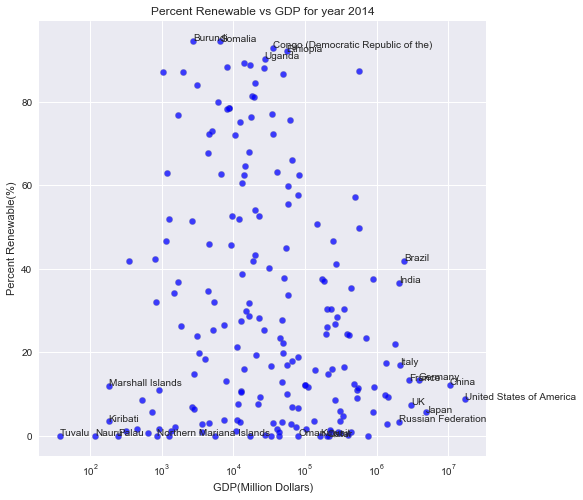

In [102]:
#create a dataframe for a single year(2014)
result14 = result.loc[result['Year'] == 2014]
result14
#create a scatter plot to show relationship between Percent Renewable and GDP
fig1 = result14.plot(kind="scatter", x="GDP", y="Percent Renewable", grid=True, figsize=(8,8),
              title="Percent Renewable vs GDP for year 2014",color="blue", edgecolors="grey", alpha=0.75,s = 40)
              
fig1.set_xscale('log')
plt.ylabel("Percent Renewable(%)")
plt.xlabel("GDP(Million Dollars)")
plt.style.use('seaborn')


#find the top 10 gdp countries
result2_gdp = result14.sort_values(by=['GDP'], ascending = False)
top_10_gdp = result2_gdp.head(10)

#find the top 5 renewable resource countries
result3_gdp = result14.sort_values(by=['Percent Renewable'], ascending = False)
top_5_ren = result3_gdp.head(5)

#find the bottom 5 gdp countries
result4_gdp = result14.sort_values(by=['GDP'], ascending = True)
bottom_5_GDP = result4_gdp.head(5)

#find the bottom 5 renewable countries
result5_gdp = result14.sort_values(by=['Percent Renewable'], ascending = True)
bottom_5_ren = result5_gdp.head(5)

#rename a cloumn in the table top_10_gdp
top_10_gdp['Country']=top_10_gdp['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'UK')

#run for loops on the above dataframes to label the points in the graph
for index,row in top_10_gdp.iterrows():
    fig1.annotate(row["Country"], xy=(row["GDP"],row["Percent Renewable"]))

for index,row in top_5_ren.iterrows():
    fig1.annotate(row["Country"], xy=(row["GDP"],row["Percent Renewable"]))

for index,row in bottom_5_GDP.iterrows():
    fig1.annotate(row["Country"], xy=(row["GDP"],row["Percent Renewable"]))
    
for index,row in bottom_5_ren.iterrows():
    fig1.annotate(row["Country"], xy=(row["GDP"],row["Percent Renewable"]))

    
plt.savefig("images/gdp_final.png")    
plt.show()



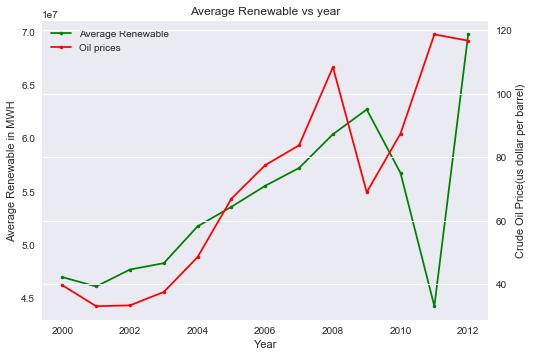

In [103]:

#Remove null values from Renew column[renew column is in Mwh]
result_na1 =result[pd.notnull(result['Renew Kwh'])]
result_na1
#Remove null values from Emission column
result_na1[pd.notnull(result_na1['Emission'])]

#group by year
result_grouped_year =result_na1.groupby("Year")
result_grouped_year.count().head()
#calculate average value of renewable
average_renewable = result_grouped_year["Renew Kwh"].mean()
average_renewable
#calculate average value of emission
average_emission = result_grouped_year["Emission"].mean()
average_emission 

#create a dataframe to store the above data
new_df = pd.DataFrame({"Average Emission":average_emission,
                      "Average Renewable":average_renewable})
new_df.dropna()

new_df.to_csv("new_df_average.csv")
#Read the csv file 
new_df_average = pd.read_csv("new_df_average.csv")
new_df_average

#load the csv file for oil prices
oil_data = pd.read_csv("crude-oil-prices - Copy.csv")
oil_data

#create a new df for required years for oil data
options = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
result_combined_oil = oil_data.loc[oil_data['Year'].isin(options)] 
result_combined_oil

result_oil_final = result_combined_oil.head(13)
result_oil_final

#merge the two files 
merged_1_oil= pd.merge(new_df_average,result_oil_final,on='Year')
merged_1_oil

#plot graph with two y axis
fig, ax1 = plt.subplots()
plot1 = ax1.plot(merged_1_oil["Year"],merged_1_oil["Average Renewable"], color="green",marker=".",label = "Average Renewable")
ax1.set_title("Average Renewable vs year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Average Renewable in MWH")
ax1.grid()


ax2 = ax1.twinx()
ax2.set_ylabel("Crude Oil Price(us dollar per barrel)")
ax2.set_label("Crude oil Prices")
plot2 = ax2.plot(merged_1["Year"],merged_1["Crude oil prices (US dollars per barrel)"], color="red", marker=".",label = "Oil prices")

#create legend for the plot
lns = plot1+plot2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

#save as png file
plt.savefig("images/twinplot.png")

plt.show()















C:\Users\agarw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\agarw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agarw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

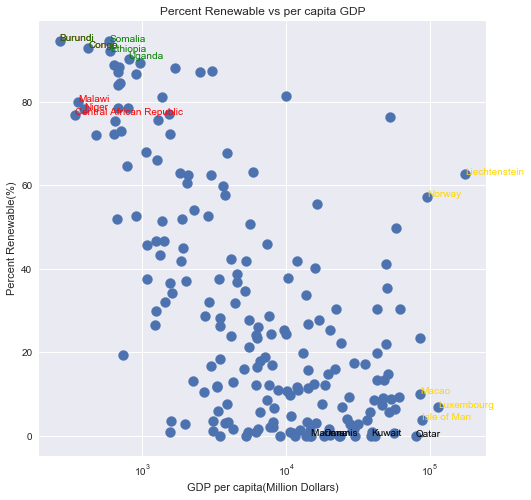

In [109]:
#calculate gdp per capita
result14['per capita GDP'] = result14['GDP']*1000000/result14['Population']
result14

#plot percent renewable vs per capita GDP
fig2 = result14.plot(kind="scatter", x="per capita GDP", y="Percent Renewable", grid=True, figsize=(8,8),
              title="Percent Renewable vs per capita GDP",s=100)

plt.style.use('seaborn')
fig2.set_xscale('log')

#calculate the top 5 renewable resource country
result2_percapita = result14.sort_values(by=['Percent Renewable'], ascending = False)
top_5_ren = result2_percapita.head(5)
#calculate the top per capita gdp countries
result3_percapita = result14.sort_values(by=['per capita GDP'], ascending = False)
top_5_percapita = result3_percapita.head(5)
#calculate the bottom per capita gdp
result4_percapita = result14.sort_values(by=['per capita GDP'], ascending = True)
bottom_5_percapita = result4_percapita.head(5)
#calculate bottom percent renewable countries
result5_percapita = result14.sort_values(by=['Percent Renewable'], ascending = True)
bottom_5_ren = result5_percapita.head(5)
#calculate the top 10 gdp for the dataframe 
result6_pc = result14.sort_values(by=['GDP'], ascending = False)
top_10_gdp_withpc = result6_pc.head(10)

#rename  column 
bottom_5_ren['Country']=bottom_5_ren['Country'].replace(['Northern Mariana Islands'],'Mariana is')

top_5_ren['Country']=top_5_ren['Country'].replace(['Congo (Democratic Republic of the)'],'Congo')

bottom_5_percapita['Country']=bottom_5_percapita['Country'].replace(['Congo (Democratic Republic of the)'],'Congo')

#run loop to label the points
for index,row in top_5_percapita.iterrows():
    fig2.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="gold")
    
for index,row in bottom_5_percapita.iterrows():
    fig2.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="red")
    
for index,row in bottom_5_ren.iterrows():
    fig2.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="black")
    
for index,row in top_5_ren.iterrows():
    fig2.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="green")    
    
plt.xlabel("GDP per capita(Million Dollars)")
plt.ylabel("Percent Renewable(%)")
plt.title("Percent Renewable vs per capita GDP") 


plt.savefig("images/percapita_gdp.png")    
plt.show()





C:\Users\agarw\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


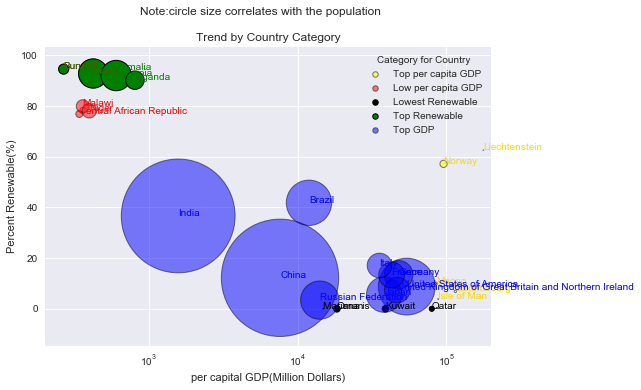

In [110]:
#create a bubble plot where size=population
plt.xscale('log')
plt.xlim(200,200000)
plt.scatter(x=top_5_percapita["per capita GDP"], y=top_5_percapita["Percent Renewable"],s= top_5_percapita["Population"]/100000,c="yellow", 
      edgecolor='black', linewidth=1, alpha=0.5,label ="Top per capita GDP")
plt.scatter(x=bottom_5_percapita["per capita GDP"], y=bottom_5_percapita["Percent Renewable"],s= bottom_5_percapita["Population"]/100000,c="red", 
      edgecolor='black', linewidth=1, alpha=0.5,label ="Low per capita GDP")
plt.scatter(x=bottom_5_ren["per capita GDP"], y=bottom_5_ren["Percent Renewable"],s= bottom_5_ren["Population"]/100000,c="black", 
      edgecolor='black', linewidth=1, alpha=1,label ="Lowest Renewable")
plt.scatter(x=top_5_ren["per capita GDP"], y=top_5_ren["Percent Renewable"],s= top_5_ren["Population"]/100000,c="green", 
      edgecolor='black', linewidth=1, alpha=1,label ="Top Renewable")
plt.scatter(x=top_10_gdp_withpc["per capita GDP"], y=top_10_gdp_withpc["Percent Renewable"],s= top_10_gdp_withpc["Population"]/100000,c="blue", 
      edgecolor='black', linewidth=1, alpha=0.5,label ="Top GDP")


#run loop for creating labels of the points
for index,row in top_5_percapita.iterrows():
    plt.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="gold")
for index,row in bottom_5_percapita.iterrows():
    plt.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="red")
for index,row in bottom_5_ren.iterrows():
    plt.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="black")
for index,row in top_5_ren.iterrows():
    plt.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="green")
for index,row in top_10_gdp_withpc.iterrows():
    plt.annotate(row["Country"], xy=(row["per capita GDP"],row["Percent Renewable"]),color="blue")    
#rename a column 
top_10_gdp_withpc['Country']=top_10_gdp_withpc['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'UK')


#create a legend 
my_legend = plt.legend(loc='upper right', title='Category for Country', 
                       scatterpoints=1)

for handle in my_legend.legendHandles:
    handle.set_sizes([30])

plt.xlabel("per capital GDP(Million Dollars)")
plt.ylabel("Percent Renewable(%)")
plt.title("Trend by Country Category") 
plt.suptitle("Note:circle size correlates with the population")
   
plt.style.use('seaborn')
plt.savefig("images/bubble.png")    
plt.show()

            